In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
import numpy as np
import math
import os

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

from matplotlib import pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div class="alert alert-block alert-info">
 <h3>Reading # of documents.</h3>
</div>

In [2]:
# get text files names 
text_files = [file for file in os.listdir() if "txt" in file]
text_files

['CS_future.txt', 'GAZA_strip.txt', 'Ramadan_in_Egypt.txt']

In [3]:
# read all text files in one single list
docs = list()
for text_file in text_files:
    with open (text_file, "r") as myfile:
        docs.append(myfile.read())

docs

['Computer science is a dynamic and rapidly evolving field that continues to shape the future in profound ways. As technology advances at an unprecedented pace, the role of computer science in shaping our world is becoming increasingly prominent. From artificial intelligence to quantum computing, the possibilities and potential impact of computer science on society are vast and transformative.\n\nOne of the key areas where computer science is expected to play a significant role in the future is artificial intelligence (AI). AI technologies are already being integrated into various aspects of our lives, from virtual assistants like Siri and Alexa to self-driving cars and predictive analytics. In the future, AI is likely to revolutionize industries such as healthcare, finance, transportation, and manufacturing, leading to increased efficiency, automation, and innovation.\n\nAnother emerging field within computer science is quantum computing. Quantum computers have the potential to solve 

<div class="alert alert-block alert-info">
 <h3>Applying Preprocessing.</h3>
</div>

In [4]:
# Punctuations to be cleaned from our text
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

# English stop words with nltk
stop_words = stopwords.words('english')

# Lemmatizer
lemmatizer = WordNetLemmatizer()


In [77]:
def preprocess(
    text : str, 
    stemmer_name : str = None
    ) -> list:
    #remove punctuations / cleaning
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    # #remove English stopping words & Normalization & tokenization
    text = [word.lower() for word in text.split()]
    text = [word for word in text if word not in stop_words]
    # # lemmatization
    lemmas = [lemmatizer.lemmatize(word) for word in text]

    return [lemma for lemma in lemmas if len(lemma) >= 3]

In [78]:
[preprocess(doc) for doc in docs]

[['computer',
  'science',
  'dynamic',
  'rapidly',
  'evolving',
  'field',
  'continues',
  'shape',
  'future',
  'profound',
  'way',
  'technology',
  'advance',
  'unprecedented',
  'pace',
  'role',
  'computer',
  'science',
  'shaping',
  'world',
  'becoming',
  'increasingly',
  'prominent',
  'artificial',
  'intelligence',
  'quantum',
  'computing',
  'possibility',
  'potential',
  'impact',
  'computer',
  'science',
  'society',
  'vast',
  'transformative',
  'one',
  'key',
  'area',
  'computer',
  'science',
  'expected',
  'play',
  'significant',
  'role',
  'future',
  'artificial',
  'intelligence',
  'technology',
  'already',
  'integrated',
  'various',
  'aspect',
  'life',
  'virtual',
  'assistant',
  'like',
  'siri',
  'alexa',
  'selfdriving',
  'car',
  'predictive',
  'analytics',
  'future',
  'likely',
  'revolutionize',
  'industry',
  'healthcare',
  'finance',
  'transportation',
  'manufacturing',
  'leading',
  'increased',
  'efficiency',
  

In [55]:
processed_docs = [" ".join(preprocess(doc)) for doc in docs]
processed_docs

['computer science dynamic rapidly evolving field continues shape future profound way technology advance unprecedented pace role computer science shaping world becoming increasingly prominent artificial intelligence quantum computing possibility potential impact computer science society vast transformative one key area computer science expected play significant role future artificial intelligence technology already integrated various aspect life virtual assistant like siri alexa selfdriving car predictive analytics future likely revolutionize industry healthcare finance transportation manufacturing leading increased efficiency automation innovation another emerging field within computer science quantum computing quantum computer potential solve complex problem speed order magnitude faster classical computer could profound implication field cryptography drug discovery optimization material science quantum computing still early stage researcher industry leader investing heavily developme

In [56]:
# length of each doc befor preprocessing and after 
list(zip([len(doc.split()) for doc in docs], [len(doc.split()) for doc in processed_docs]))

[(425, 260), (413, 237), (390, 211)]

<div class="alert alert-block alert-info">
 <h3>Getting unique words.</h3>
</div>

In [57]:
def get_unique_words(
    words:list
    ) -> list:
    return [*set(words)]

In [58]:
unique_worded_docs = [get_unique_words(doc.split()) for doc in processed_docs]

# wrapping up all docs unique words
unique_words = sum(unique_worded_docs, [])
unique_words = get_unique_words(unique_words)

unique_worded_docs = [" ".join(doc) for doc in unique_worded_docs]
unique_worded_docs

['network solve pace protocol agriculture becoming challenge physical communicate predictive rapidly siri expected new lead opportunity object world key complex development analytics could shaping every continues grows conclusion encryption full smart heavily problem detection change increasingly city play emerging asset quantum evolving discovery interconnectedness impact working efficient industry revolutionize global speed healthcare integrated order likely investing allowing within role one algorithm material possibility aspect protect field filled like transportation sustainable information still crucial advanced digital culture vast significant classical leader scientist create transforming researcher importance various alexa utmost developing area cryptography technique unprecedented computer increased interconnected computing automation leading data system need way future virtual selfdriving thing issue society internet magnitude poised work potential manufacturing cyber exciti

In [59]:
len(unique_words)

446

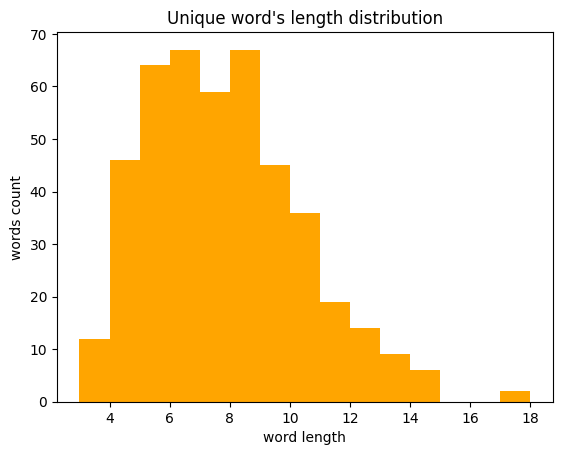

In [60]:
plt.hist(list(map(len, unique_words)), bins=15, color='orange')
plt.xlabel("word length")
plt.ylabel("words count")
plt.title("Unique word's length distribution")
plt.show()

<div class="alert alert-block alert-info">
 <h3>TF-IDF from SKLEARN</h3>
</div>

In [61]:
vectorizer = TfidfVectorizer()
vectorizer.fit(unique_worded_docs)
X = vectorizer.transform(unique_worded_docs)
print(X.T.shape)
tf_idf_sk = pd.DataFrame(X.T.toarray(),vectorizer.get_feature_names_out(), text_files)

(446, 3)


In [62]:
tf_idf_sk.sample(15).T

,widespread,dawn,overall,artificial,faster,food,vital,magnitude,sense,coming,coast,effort,driving,loss,organization
CS_future.txt,0.000000,0.000000,0.000000,0.079314,0.079314,0.000000,0.000000,0.079314,0.000000,0.000000,0.000000,0.000000,0.079314,0.000000,0.000000
GAZA_strip.txt,0.079941,0.000000,0.000000,0.000000,0.000000,0.060797,0.079941,0.000000,0.060797,0.079941,0.079941,0.079941,0.000000,0.079941,0.079941
Ramadan_in_Egypt.txt,0.000000,0.085628,0.085628,0.000000,0.000000,0.065122,0.000000,0.000000,0.065122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
built_in_words = set(vectorizer.get_feature_names_out())
built_in_words

{'2007',
 '2021',
 'actively',
 'activity',
 'adding',
 'address',
 'adorn',
 'adult',
 'advance',
 'advanced',
 'adversity',
 'agency',
 'agriculture',
 'aid',
 'aiming',
 'alexa',
 'alfitr',
 'algorithm',
 'allowing',
 'already',
 'also',
 'among',
 'analytics',
 'another',
 'approximately',
 'area',
 'armed',
 'around',
 'artificial',
 'artistic',
 'aspect',
 'asset',
 'assistance',
 'assistant',
 'atmosphere',
 'attending',
 'automation',
 'basic',
 'becomes',
 'becoming',
 'begin',
 'better',
 'blessing',
 'blockade',
 'bordered',
 'break',
 'breaking',
 'brighter',
 'bringing',
 'brings',
 'calendar',
 'car',
 'cause',
 'celebrated',
 'celebration',
 'center',
 'certain',
 'challenge',
 'challenging',
 'change',
 'charity',
 'cherished',
 'circumstance',
 'city',
 'civil',
 'civilian',
 'classical',
 'closer',
 'coast',
 'coastal',
 'colorful',
 'come',
 'coming',
 'communal',
 'communicate',
 'communication',
 'community',
 'compassion',
 'complete',
 'complex',
 'computer',
 'c

<div class="alert alert-block alert-info">
 <h3>TF-IDF implementation from scratch</h3>
</div>

In [64]:
def sentExist(word,sent):
  count=0
  for i in sent.split():
    if i == word:
      count+=1

  return count

In [65]:
def docsExist(word,docs):
  counter = 0
  for i in docs:
    if word in i.split():
      counter +=1
  return counter

In [66]:
def tf_count(uniq_words,docs):
  tf_mat = np.zeros((len(uniq_words),len(docs)))
  for i in range(len(uniq_words)):
    for j in range(len(docs)):
      tf_mat[i,j] = (sentExist(uniq_words[i],docs[j]))

  return tf_mat.astype(int)

In [67]:
pd.DataFrame(tf_count(unique_words,unique_worded_docs),index = unique_words, columns=text_files).sample(10).T

,working,one,humanitarian,come,local,infrastructure,industry,group,resilient,obligatory
CS_future.txt,1,1,0,0,0,1,1,0,0,0
GAZA_strip.txt,0,1,1,0,1,1,0,1,1,0
Ramadan_in_Egypt.txt,0,1,0,1,0,0,0,0,0,1


In [68]:
def idf_single( unique_words,all_docs):

    n_docs = len(all_docs)
    len_words = len(unique_words)
    idf = np.zeros(len_words)
    for i in range(len(unique_words)):
        frq = docsExist(unique_words[i],docs)
        idf[i] = math.log(float(n_docs + 1) / float(frq + 1)) + 1
    return idf.reshape(-1,1)

In [69]:
pd.DataFrame(idf_single(unique_words,unique_worded_docs),index = unique_words).sample(10).T

,received,among,reconciliation,importance,ramadan,evolving,power,dynamic,implication,ongoing
0,1.693147,1.287682,2.386294,1.287682,2.386294,1.693147,1.693147,1.693147,2.386294,1.693147


In [70]:
# tf - idf with normalization
tf_= tf_count(unique_words,unique_worded_docs)
idf_=idf_single(unique_words,unique_worded_docs)
tf_idf = idf_*tf_
norm  =np.sqrt((tf_idf*tf_idf).sum(axis=0))
tf_idf_df = pd.DataFrame(tf_idf/norm,index = unique_words, columns=text_files)

In [71]:
tf_idf_df.shape

(446, 3)

In [72]:
tf_idf_df.sample(15).T

,one,difficult,coast,economy,may,israel,calendar,threat,assistance,peace,defining,solidarity,two,intelligence,cultural
CS_future.txt,0.051379,0.000000,0.000000,0.095215,0.000000,0.000000,0.000000,0.067558,0.000000,0.000000,0.000000,0.000000,0.000000,0.067558,0.000000
GAZA_strip.txt,0.051623,0.067879,0.067879,0.000000,0.095667,0.095667,0.000000,0.000000,0.067879,0.067879,0.067879,0.000000,0.067879,0.000000,0.067879
Ramadan_in_Egypt.txt,0.054584,0.000000,0.000000,0.000000,0.000000,0.000000,0.101154,0.000000,0.000000,0.000000,0.000000,0.101154,0.000000,0.000000,0.071771


In [73]:
tf_idf_df.loc["mark"], tf_idf_sk.loc["mark"]

(CS_future.txt           0.000000
 GAZA_strip.txt          0.000000
 Ramadan_in_Egypt.txt    0.101154
 Name: mark, dtype: float64,
 CS_future.txt           0.000000
 GAZA_strip.txt          0.000000
 Ramadan_in_Egypt.txt    0.085628
 Name: mark, dtype: float64)

In [74]:
tf_idf_df.loc["complex"], tf_idf_sk.loc["complex"]

(CS_future.txt           0.051379
 GAZA_strip.txt          0.051623
 Ramadan_in_Egypt.txt    0.000000
 Name: complex, dtype: float64,
 CS_future.txt           0.060321
 GAZA_strip.txt          0.060797
 Ramadan_in_Egypt.txt    0.000000
 Name: complex, dtype: float64)

In [75]:
tf_idf_df.loc["importance"], tf_idf_sk.loc["importance"]

(CS_future.txt           0.051379
 GAZA_strip.txt          0.000000
 Ramadan_in_Egypt.txt    0.054584
 Name: importance, dtype: float64,
 CS_future.txt           0.060321
 GAZA_strip.txt          0.000000
 Ramadan_in_Egypt.txt    0.065122
 Name: importance, dtype: float64)

In [76]:
list(set(unique_words).difference(built_in_words))

[]

In [48]:
docs=[ "the cats are in the house",
        "the dogs are in the house and outside",
        "the cats and dogs are friends",
       "how to be a true king",
       "We have a damn midterm next week ohhh",
       "what are you having for iftar today"]

In [49]:
get_unique_words(sum([preprocess(doc) for doc in docs], []))

['friend',
 'outside',
 'true',
 'midterm',
 'iftar',
 'house',
 'today',
 'dog',
 'next',
 'ohhh',
 'cat',
 'week',
 'damn',
 'we',
 'king']

In [42]:
lemmatizer.lemmatize("fjkrebgrebging")

'fjkrebgrebging'

In [41]:
porter_stemmer.stem("fjkrebgrebging")

'fjkrebgrebg'

In [47]:
vectorizer = TfidfVectorizer()
vectorizer.fit(docs)
vectorizer.get_feature_names_out()

array(['and', 'are', 'be', 'cats', 'damn', 'dogs', 'for', 'friends',
       'have', 'having', 'house', 'how', 'iftar', 'in', 'king', 'midterm',
       'next', 'ohhh', 'outside', 'the', 'to', 'today', 'true', 'we',
       'week', 'what', 'you'], dtype=object)